In [4]:
#name - rakesh ravi
#computing ID - rk9cx
import numpy as np
import pandas as pd
import sklearn.mixture as mx 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats, linalg

In [5]:
# Num samples
M = 100

# SNR value
SNR = 6

# positions of the non-zero basis
K = [11, 64] 

# generate sample Xn
x = np.linspace(-10, 10, M)

In [6]:

phi = []

In [7]:
for i, xn in enumerate(x):
    phi.append(np.exp(-5*((x - xn)**2)))
    
phi = np.array(phi)

In [8]:
phi_cov = np.matmul(phi.T, phi)

In [9]:
y0 = np.array(phi)[:, K[0]] + np.array(phi)[:, K[1]]

In [10]:
# add noise
s_y = np.matmul(y0.T, y0) / M
s_n = s_y / 10**(SNR/10)
n = np.sqrt(s_n) * np.random.randn(M, 1).T
y = y0 + n
y = y.T

In [13]:
# LS Method
w_LS = np.linalg.lstsq(phi_cov, np.matmul(phi.T, y))[0]
y_LS = np.matmul(phi, w_LS)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [14]:
# EM algorithm
# initialization
EMiter = 100
beta = 1e0
alpha_EM = 1
Sigma_EM = np.eye(M)

for i in range(1, EMiter):
    Sigma_EM = np.linalg.inv((beta * phi_cov) + alpha_EM * np.eye(M))
    mu_EM = np.matmul(beta*Sigma_EM, np.matmul(phi.T, y))
    
    alpha_EM = np.divide(M, (np.matmul(mu_EM.T, mu_EM) + np.trace(Sigma_EM)))
    
    beta = np.divide(M, (np.linalg.norm(y - np.matmul(phi, mu_EM))**2 + np.trace(np.matmul(Sigma_EM, phi_cov))))

# EM estimates
y_EM = np.matmul(phi, mu_EM)

In [15]:
# Variational Bayes algorithm
# initialization
VBiter = 200
beta = 1e2
alpha_VB = 3e5 * np.ones((M, 1))
hyp_j = 0
mu_VB = np.zeros((M,1))
for i in range(1, VBiter):

    Sigma_VB = np.linalg.inv(beta * (phi_cov) + np.diag(alpha_VB))   
    mu_VB = np.matmul(np.matmul((beta * Sigma_VB), phi.T), y)
    
    alpha_VB = (hyp_j + .5) / (hyp_j + .5 * (np.square(mu_VB) + np.diag(Sigma_VB)));
    
    temp_norm = np.linalg.norm(y - np.matmul(phi, mu_VB))
    
    beta = (hyp_j + .5 * M) / (hyp_j + .5 * (temp_norm**2 + np.trace( np.matmul(Sigma_VB, phi_cov))))

# variational Bayes estimates
y_VB = np.matmul(phi, mu_VB) 

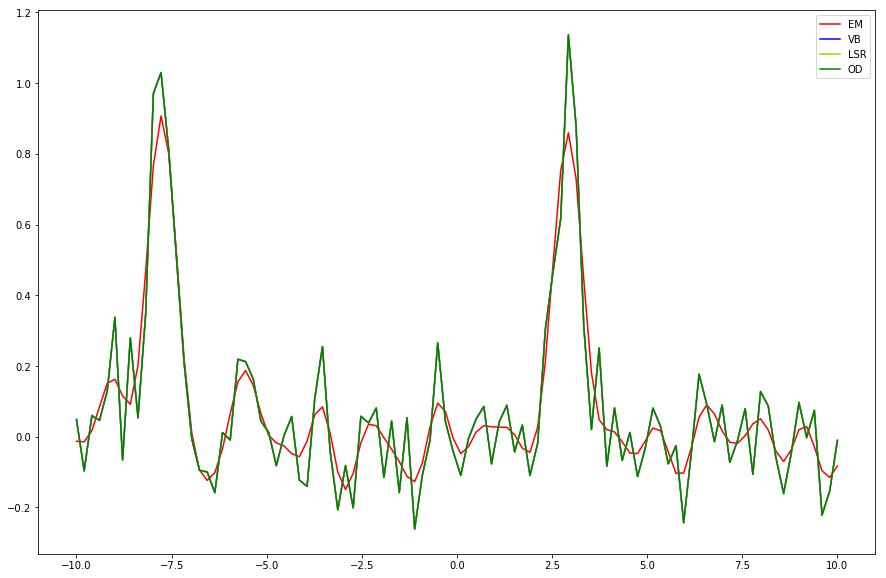

In [17]:
from numpy import *
import math
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(x, y_EM, 'r', label='EM') # plotting t, a separately 
plt.plot(x, y_VB, 'b', label='VB')
plt.plot(x, y_LS, 'y', label='LSR')
plt.plot(x, y, 'g', label='OD')# plotting t, b separately 

plt.legend()
plt.show()